In [65]:
from torchvision.io import read_video
import os
import torchvision
import torch
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import re
import numpy as np
from utils import InputPadder
import cv2 as cv
import uuid

In [82]:
# from https://stackoverflow.com/questions/50474302/how-do-i-adjust-brightness-contrast-and-vibrance-with-opencv-python
def increase_contrast_brightness(img, contrast, brightness):
    img = np.int16(img)
    img = img * (contrast/127+1) - contrast + brightness
    img = np.clip(img, 0, 255)
    img = np.uint8(img)
    return img

In [195]:
video_path = "calib_challenge/labeled/4.hevc"
# tmp_filename  = uuid.uuid1().hex + '.mp4'
# tmp_filename2 = uuid.uuid1().hex + '.mp4'

cap = cv.VideoCapture(cv.samples.findFile(video_path))
_, image1 = cap.read()
for i in range(1):
    _,_ = cap.read()
_, image2 = cap.read()

# image1 = increase_brightness(image1, 80)
# image2 = increase_brightness(image2, 80)
image1 = increase_contrast_brightness(image1, 127, 60)
image2 = increase_contrast_brightness(image2, 127, 60)

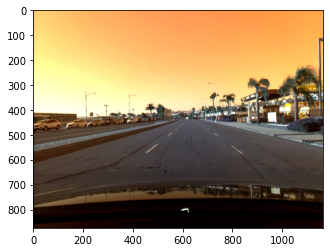

In [196]:
plt.imshow(image1)

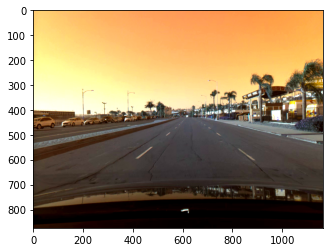

In [197]:
plt.imshow(image2)

In [198]:
model = torchvision.models.optical_flow.raft_small(pretrained=True)
model.eval()
model_type = "raft"

In [199]:
# cap = cv.VideoCapture(cv.samples.findFile(video_path))
# _, image1 = cap.read()
# _, image2 = cap.read()

image1 = torch.permute(torch.from_numpy(image1), (2,0,1)).float()
image2 = torch.permute(torch.from_numpy(image2), (2,0,1)).float()
padder = InputPadder(image1.shape)
image1, image2 = padder.pad(image1, image2)
image1 = image1.unsqueeze(0)
image2 = image2.unsqueeze(0)
output = model(image1, image2)

output = output[-1]
output = padder.unpad(output)

output = output.squeeze()

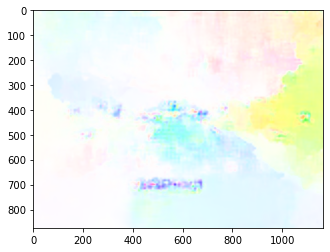

In [139]:
# 0
flow_viz = torchvision.transforms.ToPILImage()(torchvision.utils.flow_to_image(output))
plt.imshow(flow_viz)

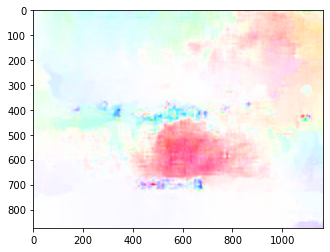

In [145]:
# 25
flow_viz = torchvision.transforms.ToPILImage()(torchvision.utils.flow_to_image(output))
plt.imshow(flow_viz)

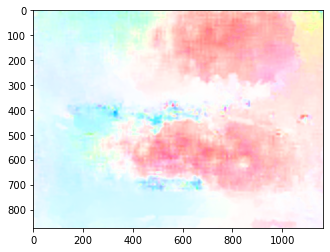

In [151]:
# 50
flow_viz = torchvision.transforms.ToPILImage()(torchvision.utils.flow_to_image(output))
plt.imshow(flow_viz)

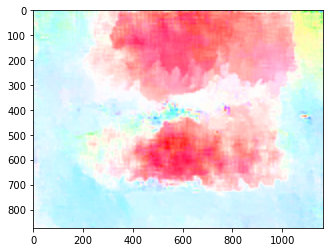

In [157]:
# 75
flow_viz = torchvision.transforms.ToPILImage()(torchvision.utils.flow_to_image(output))
plt.imshow(flow_viz)

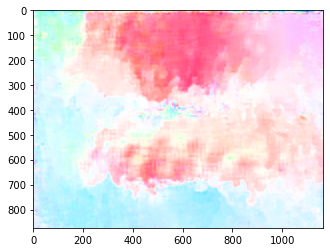

In [181]:
# 100
flow_viz = torchvision.transforms.ToPILImage()(torchvision.utils.flow_to_image(output))
plt.imshow(flow_viz)

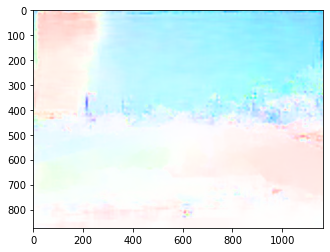

In [200]:
# 127 contrast, 60 brightness
flow_viz = torchvision.transforms.ToPILImage()(torchvision.utils.flow_to_image(output))
plt.imshow(flow_viz)

In [223]:
def write_flow(flow, filename):
    """
    write optical flow in Middlebury .flo format
    :param flow: optical flow map
    :param filename: optical flow file path to be saved
    :return: None
    """
    flow = flow.detach().numpy()
    f = open(filename, 'wb')
    magic = np.array([202021.25], dtype=np.float32)
    (height, width) = flow.shape[1:3]
    w = np.array([width], dtype=np.int32)
    h = np.array([height], dtype=np.int32)
    magic.tofile(f)
    w.tofile(f)
    h.tofile(f)
    flow.tofile(f)
    f.close()
def read_flow(filename):
    """
    read optical flow from Middlebury .flo file
    :param filename: name of the flow file
    :return: optical flow data in matrix
    """
    f = open(filename, 'rb')
    try:
        magic = np.fromfile(f, np.float32, count=1)[0]    # For Python3.x
    except:
        magic = np.fromfile(f, np.float32, count=1)       # For Python2.x
    data2d = None

    if 202021.25 != magic:
        print('Magic number incorrect. Invalid .flo file')
    else:
        w = np.fromfile(f, np.int32, count=1)
        h = np.fromfile(f, np.int32, count=1)
        #print("Reading %d x %d flo file" % (h, w))
        data2d = np.fromfile(f, np.float32, count=2 * w[0] * h[0])
        # reshape data into 3D array (columns, rows, channels)
        data2d = np.resize(data2d, (2, h[0], w[0]))
        data2d = torch.from_numpy(data2d)
    f.close()
    return data2d

In [224]:
write_flow(output, "test_flow.flo")
flow_in = read_flow("test_flow.flo")

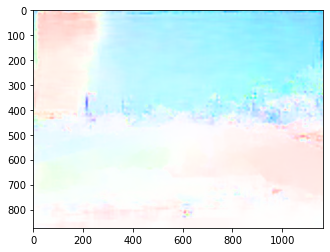

In [225]:
flow_in_viz = torchvision.transforms.ToPILImage()(torchvision.utils.flow_to_image(flow_in))
plt.imshow(flow_viz)

In [222]:
output.detach().numpy().shape

(2, 874, 1164)